## Plotting ZDF data files

To Plot ZDF data files you must first import the ZDF module

In [6]:
from zdf import zdf_read_grid

Next you need to read the data. You should also read the metadata while you are at it.

In [7]:
(data, info) = zdf_read_grid( "J3-000500.zdf" )

data is a NumPy ndarray, info is a dictionary with all the Metadata.

In [8]:
print(type(data))

print(info)

<class 'numpy.ndarray'>
{'grid': {'ndims': 2, 'nx': [128, 128], 'label': 'J3', 'units': 'e \\omega_p^2 / c', 'has_axis': 1, 'axis': [{'type': 0, 'min': 0.0, 'max': 12.800000190734863, 'label': 'x_1', 'units': 'c/\\omega_p'}, {'type': 0, 'min': 0.0, 'max': 12.800000190734863, 'label': 'x_2', 'units': 'c/\\omega_p'}]}, 'iteration': {'n': 500, 't': 35.0, 'tunits': '1/\\omega_p'}}


You can plot the data with any of your favorite tools.

**Plotting with Bokeh**

In [9]:
import numpy as np
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from bokeh.plotting import figure
from bokeh.models import LinearColorMapper, BasicTicker, ColorBar
from bokeh.core.enums import TextBaseline

p = figure(x_range=(info['grid']['axis'][0]['min'], info['grid']['axis'][0]['max']), 
           y_range=(info['grid']['axis'][1]['min'], info['grid']['axis'][1]['max']),
           toolbar_sticky=False)
p.title.text = info['grid']['label']

p.xaxis.axis_label = info['grid']['axis'][0]['label']
p.yaxis.axis_label = info['grid']['axis'][1]['label']

color_map = LinearColorMapper(palette="Viridis256", low = np.amin(data), high = np.amax(data))

p.image(image=[data], x = 0, y = 0, 
        dw = info['grid']['axis'][0]['max'], dh = info['grid']['axis'][1]['max'], 
        color_mapper = color_map )

color_bar = ColorBar(color_mapper = color_map, ticker = BasicTicker(),
                     location = (0,0))
p.add_layout( color_bar, 'right')

t = show(p, notebook_handle = True)

Loading BokehJS ...

**Plotting with MatplotLib**

<IPython.core.display.Javascript object>


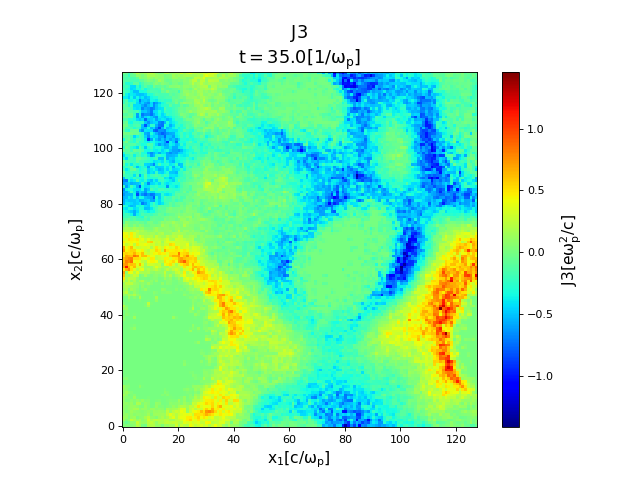

In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook

fig = plt.figure( figsize = (8,6), dpi = 80)
fig.subplots_adjust( top = 0.85 )
fig.set_facecolor("#FFFFFF") 

timeLabel = r'$\sf{t = ' + str( info['iteration']['t'] ) + \
                     ' ['+info['iteration']['tunits']+r']}$'
plotTitle = r'$\sf{' + info['grid']['label'] + r'}$' + '\n' + timeLabel

plotArea = fig.add_subplot(1,1,1)
plotArea.set_title(plotTitle, fontsize = 16)

colorMap = plotArea.imshow(data, cmap = plt.cm.jet, interpolation = 'nearest', 
                           origin = 'lower')

colorBar = fig.colorbar(colorMap)
colorBar.set_label(r'$\sf{'+info['grid']['label'] +
        ' [' + info['grid']['units'] + r']}$', fontsize = 14)

xlabel = info['grid']['axis'][0]['label'] + '[' + info['grid']['axis'][0]['units'] + ']'
ylabel = info['grid']['axis'][1]['label'] + '[' + info['grid']['axis'][1]['units'] + ']'
plt.xlabel(r'$\sf{'+xlabel+r'}$', fontsize = 14)
plt.ylabel(r'$\sf{'+ylabel+r'}$', fontsize = 14)
